In [2]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("Churn_Modelling.csv")

In [7]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1, inplace =True)

In [9]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [12]:
import matplotlib.pyplot as plt

In [13]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
import seaborn as sns
import warnings

In [15]:
df.replace(
    {
        "Female" : 0,
        "Male" : 1
    }, inplace = True 
)

In [16]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df1 = pd.get_dummies(data = df, columns = ["Geography"],dtype = int)

In [18]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int32
Geography_Germany      int32
Geography_Spain        int32
dtype: object

In [19]:
corr = df1.corr(method='spearman')

<Axes: >

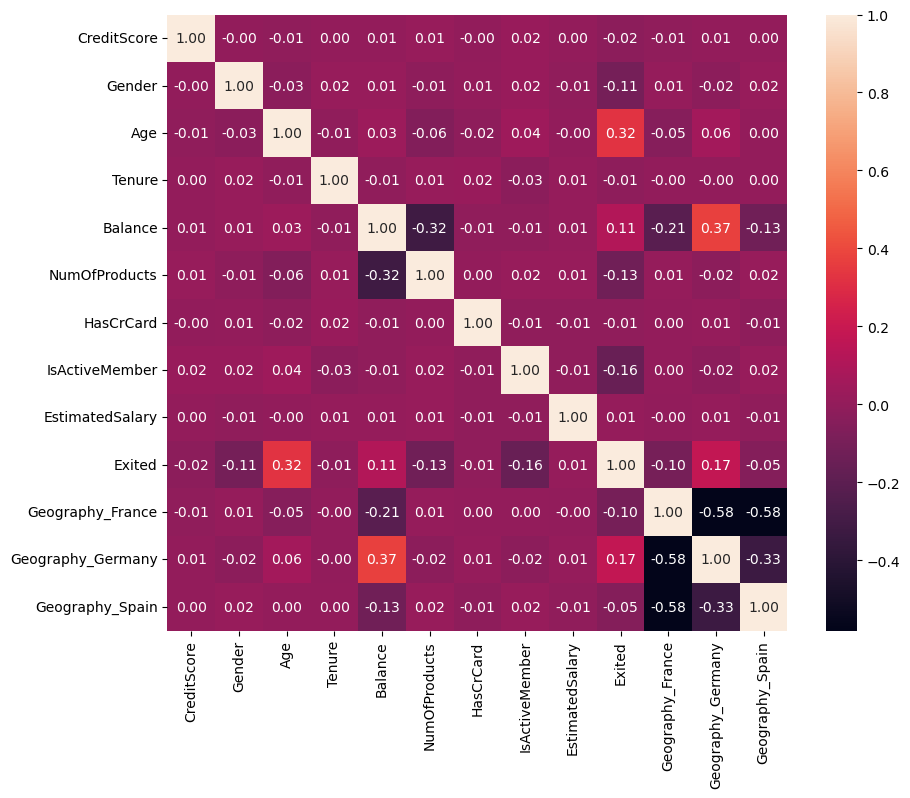

In [20]:
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, fmt = ".2f" )

<Axes: xlabel='CreditScore'>

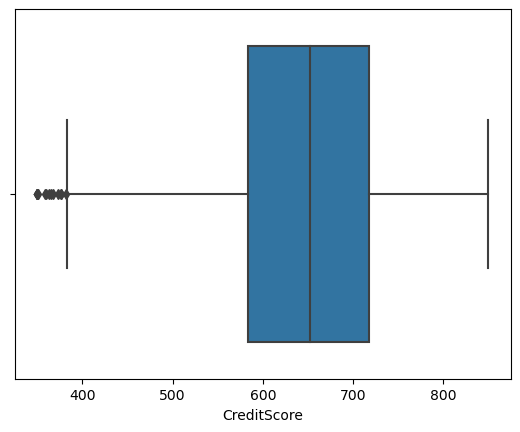

In [21]:
sns.boxplot(x = "CreditScore", data = df1)

In [22]:
from scipy import stats

In [23]:
df[stats.zscore(df1['CreditScore'])<-3]['CreditScore'].count()


8

In [24]:
outlier_index = df1[stats.zscore(df1["CreditScore"])>3].index

In [25]:
outlier_index

Index([], dtype='int64')

In [26]:
df1.drop(outlier_index, inplace = True)
df1.reset_index(drop = True, inplace = True)

In [27]:
df1.shape

(10000, 13)

In [28]:
df.shape

(10000, 11)

In [29]:
df1.isnull().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [30]:
df1.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [31]:
column_to_scale = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[column_to_scale] = scaler.fit_transform(df1[column_to_scale])

In [32]:
X = df1.drop('Exited',axis='columns')
y = df1["Exited"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5, stratify=y)

In [33]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [34]:
y_test.value_counts()

Exited
0    1593
1     407
Name: count, dtype: int64

Undersampling 


In [37]:
class_1 = df1[df1["Exited"] == 1]
class_0 = df1[df1["Exited"]==0]

In [39]:
class_1.shape

(2037, 13)

In [41]:
class_0.shape

(7963, 13)

In [44]:
class_balance = class_0.sample(2037)

In [46]:
class_balance.shape

(2037, 13)

In [48]:
df_1 = pd.concat([class_balance, class_1], axis =0)

In [141]:
df_1.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
3144,0.574949,0,0.216216,0.8,0.468124,1,1,0,0.326848,0,0,0,1
9568,0.246407,0,0.162162,0.9,0.000000,2,0,0,0.681792,0,1,0,0
8408,0.792608,1,0.243243,0.7,0.000000,2,0,0,0.400654,0,0,0,1
6301,0.841889,1,0.202703,0.9,0.000000,2,1,1,0.005534,0,1,0,0
7177,0.675565,1,0.418919,0.6,0.440579,2,0,1,0.537358,0,0,1,0


In [142]:
X = df_1.drop('Exited',axis='columns')
y = df_1["Exited"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5, stratify=y)

In [145]:
X_train.shape


(3252, 12)

In [148]:



model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(12,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
102/102 [==============================] - 2s 4ms/step - loss: 0.6878 - accuracy: 0.5483
Epoch 2/50
102/102 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.6285
Epoch 3/50
102/102 [==============================] - 0s 4ms/step - loss: 0.6331 - accuracy: 0.6596
Epoch 4/50
102/102 [==============================] - 0s 3ms/step - loss: 0.6142 - accuracy: 0.6737
Epoch 5/50
102/102 [==============================] - 0s 3ms/step - loss: 0.5970 - accuracy: 0.6842
Epoch 6/50
102/102 [==============================] - 0s 4ms/step - loss: 0.5835 - accuracy: 0.6885
Epoch 7/50
102/102 [==============================] - 0s 4ms/step - loss: 0.5695 - accuracy: 0.7011
Epoch 8/50
102/102 [==============================] - 0s 3ms/step - loss: 0.5594 - accuracy: 0.7113
Epoch 9/50
102/102 [==============================] - 0s 3ms/step - loss: 0.5525 - accuracy: 0.7214
Epoch 10/50
102/102 [==============================] - 0s 4ms/step - loss: 0.5439 - accuracy: 0.7263

In [49]:
class_1.shape

(2037, 13)

In [50]:
class_0.shape

(7963, 13)

In [51]:
over_class_1 = class_1.sample(7963, replace = True)

In [52]:
over_class_1.shape

(7963, 13)

In [53]:
df_2 = pd.concat([over_class_1, class_0], axis = 0)

In [155]:
X = df_2.drop('Exited',axis='columns')
y = df_2["Exited"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5, stratify=y)




model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(12,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
399/399 [==============================] - 2s 3ms/step - loss: 0.6406 - accuracy: 0.6246
Epoch 2/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5727 - accuracy: 0.7046
Epoch 3/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5394 - accuracy: 0.7264
Epoch 4/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5221 - accuracy: 0.7426
Epoch 5/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5119 - accuracy: 0.7492
Epoch 6/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5016 - accuracy: 0.7542
Epoch 7/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4944 - accuracy: 0.7619
Epoch 8/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4901 - accuracy: 0.7614
Epoch 9/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4852 - accuracy: 0.7619
Epoch 10/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4820 - accuracy: 0.7612

In [158]:
X = df1.drop('Exited',axis='columns')
y = df1["Exited"]

In [159]:
y.value_counts()

Exited
0    7963
1    2029
Name: count, dtype: int64

In [161]:
pip install imbalanced-Learn

Note: you may need to restart the kernel to use updated packages.


In [163]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
pip uninstall scikit-learn